<h1 style='font-size: 24px'><b>  CUSTOMER SEGMENTATION USING CLUSTERING ALGORITHMS - CLUSTER ANALYSIS WITH K-MEANS CLUSTERING AND AGGLOMERATIVE CLUSTERING,  </b></h1>
 Date: January 17, 2023  |    Author: Quynh Nguyen 

<h5> TABLE OF CONTENT </h5>

<div class="toc">
    <ul style="list-style:none">
        <li><a href="#introduction" class="anchor">I. Introduction </a>
            <ul style="list-style:none">
                <li><a href="#Intro-problem">a. About the problem</li>
                <li><a href="#Intro-project">b. About the project</li>
            </ul>
        </li>
        <li><a href="#setting" class="anchor">II. SETTING </a>
             <ul style="list-style:none">
                <li><a href="#setting-package">a. Import the packages</li>
                <li><a href="#setting-dataset">b. Import the dataset</li>
            </ul>
        </li>
        <li><a href="#analyse-dataset">III. ANALYSE THE DATASET</li>
            <ul style="list-style:none">
                <li><a href="#about-the-attributes">a. Attributes in the dataset</li>
                <li><a href="#datatype">b. Define the datatype</li>
                <li><a href="#stat-des-num">c. Statistical Description about the data - Numerical data</li>
                <li><a href="#stat-des-cat">d. Statiscal Description about the data - Categorical data</li>
                <li><a href="#eda">e. Exploratory Data Analysis</li>
            </ul>
        </li>
        <li><a href="#clean-dataset">IV. PREPARE THE DATASET</li>
            <ul style="list-style:none">
                <li><a href="#missing-data">a. Handle missing data</li>
                <li><a href="#bad-data-value">b. Handle unapproriate data value</li>                
                <li><a href="#outlier">c. Handle outliers</li>
                <li><a href="#feature-eng"> d. Feature Engineering</li>
                <li><a href="#standard">e. Standardization</li>
                <li><a href="#encode-cat">f. Encode categorical values</li>
                <li><a href="#pca">g. Principal Component Analysis (PCA)</li>
            </ul>
        <li><a href="#fit-model">V. FIT THE MODEL</li>
            <ul style="list-style:none">
                <li><a href="#kmean">a. K-means Clustering</li>
                <li><a href="#agglo">b. Agglomerative clustering</li>
            </ul>
        </li>
        <li><a href="#evaluate-cluster">VI. EVALUATE THE CLUSTER</li>
            <ul style="list-style:none">
                <li><a href="#tendency">a. Cluster Tendency</li>
                <li><a href="#quality">b. Clustering Quality</li>
            </ul>
        </li>  
        <li><a href="#intepret-cluster">VII. INTEPRET THE CLUSTER </a>     
        <li><a href="#conclusion">VIII. CONCLUSION </a>


<h5 id='introduction'> I. INTRODUCTION </h5>

<h8 id='Intro-problem'> a. About the problem </h8>

Companies need to understand the customer profile to meet their demands, provide specific solutions for them as well as improve customer service. However, it is almost impossible to satisfy every single customer, supposed that there are thousands, millions (or even more) of customers. A more viable method is to divide all customers into a few different segments in which customers share some similar traits. Then, the company can adjust the product and service to meet the need of each group of customers.

Even though knowing the importance customer segmentation, this task can be difficult due to a massive amount of customers with a very high level of diversity. The difference between each cluster can be subtle so that human ability cannot recognize and perform well the clustering task. That is why data science is applied, which includes the clustering algorithms in particular, to be able to form the most seperable customer segmentations as possible. 

<h8 id='Intro-project'> b. About the project </h8>

This project goal is to perform segmentations on a sample of customers of a supermarket. There are a wide variety of types of information about customers provided: demography, purchasing behavior, response to marketing artivities. 

To achieve that, in this project, the dataset will be interpreted, cleaned and fitted into an appropriate clustering models using 3 clustering algorithms: Agglomerative clustering and K-means clustering. Then, every models will be evaluated and compared to each other to choose the best model that can be used in practice. At the end, there is also a statiscal description so that the audience will have a better idea about how each cluster look like to adjust the business strategy and improve the service. 

<h5 id='setting'> II. SETTING </h5>


<h8 id='setting-package'> a. Import the packages </h8>

In [2]:
#packages to process and analyze the dataset
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import wrap

#package to preprocess the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#package to fit the model
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#package to visualize the machine learning model
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster import hierarchy

#package to evaluate the model
from pyclustertend import hopkins, vat
from sklearn.metrics import silhouette_score


<h8 id='setting-dataset'> b. Import the dataset </h8>

In [3]:
df = pd.read_csv('customer_personality_analysis.csv', sep=r'\t', engine='python')
df = df.drop(columns=['Z_CostContact','Z_Revenue','Dt_Customer','ID']) #remove unclear and unncessary attributes
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,5,10,3,0,0,0,0,0,0,0


<h5 id='analyse-dataset'> III. ANALYSE THE DATASET </h5>

<h8 id='about-the-attributes'> a. Attributes in the dataset </h8>

The dataset contains 27 columns and 2240 rows. Each row represents the information of a customer. The columns represents information as below:

About customer:
<table>
    <tr>
        <th> Name of Column </th>
        <th> Description </th>
    </tr>
    <tr>
        <td>ID</td>
        <td>Customer's unique identifier</td>
    </tr>
    <tr>
        <td>Year_Birth</td>
        <td>Customer's birth year</td>
    </tr>
    <tr>
        <td>Education</td>
        <td>Customer's education level</td>
    </tr>
    <tr>
        <td>Marital_Status</td>
        <td>Customer's marital status</td>
    </tr>
    <tr>
        <td>Income</td>
        <td>Customer's yearly household income</td>
    </tr>
    <tr>
        <td>Kidhome</td>
        <td>Number of children in customer's household</td>
    </tr>
    <tr>
        <td>Teenhome</td>
        <td>Number of teenagers in customer's household</td>
    </tr>
    <tr>
        <td>Recency</td>
        <td>Number of days since customer's last purchase</td>
    </tr>
    <tr>
        <td>Complain</td>
        <td>1 if the customer complained in the last 2 years, 0 otherwise</td>
    </tr>
</table>

About products that customers purchased:
<table>
    <tr>
        <th> Name of Column </th>
        <th> Description </th>
    </tr>
    <tr>
        <td>MntWines</td>
        <td>Amount spent on wine in last 2 years</td>
    </tr>
    <tr>
        <td>MntFruits</td>
        <td>Amount spent on fruits in last 2 years</td>
    </tr>
    <tr>
        <td>MntMeatProducts</td>
        <td>Amount spent on meat in last 2 years</td>
    </tr>
    <tr>
        <td>MntFishProducts</td>
        <td>Amount spent on fish in last 2 years</td>
    </tr>
    <tr>
        <td>MntSweetProducts</td>
        <td>Amount spent on sweets in last 2 years</td>
    </tr>
    <tr>
        <td>MntGoldProds</td>
        <td>Amount spent on gold in last 2 years</td>
    </tr>
</table>


About products that applied promotion that customers purchased:
<table>
    <tr>
        <th> Name of Column </th>
        <th> Description </th>
    </tr>
    <tr>
        <td>NumDealsPurchases</td>
        <td>Number of purchases made with a discount</td>
    </tr>
    <tr>
        <td>AcceptedCmp1</td>
        <td>1 if customer accepted the offer in the 1st campaign, 0 otherwise</td>
    </tr>
    <tr>
        <td>AcceptedCmp2</td>
        <td>1 if customer accepted the offer in the 2nd campaign, 0 otherwise</td>
    </tr>
    <tr>
        <td>AcceptedCmp3</td>
        <td>1 if customer accepted the offer in the 3rd campaign, 0 otherwise</td>
    </tr>
    <tr>
        <td>AcceptedCmp4</td>
        <td>1 if customer accepted the offer in the 4th campaign, 0 otherwise</td>
    </tr>
    <tr>
        <td>AcceptedCmp5</td>
        <td>1 if customer accepted the offer in the 5th campaign, 0 otherwise</td>
    </tr>
    <tr>
        <td>Response</td>
        <td>1 if customer accepted the offer in the last campaign, 0 otherwise</td>
    </tr>
</table>
[Note] Try feature engineering on the average acceptance of all campaigns

About the place where the customers make a purchase:
<table>
    <tr>
        <th> Name of Column </th>
        <th> Description </th>
    </tr>
    <tr>
        <td>NumWebPurchases</td>
        <td>Number of purchases made through the company’s website</td>
    </tr>
    <tr>
        <td>NumCatalogPurchases</td>
        <td>Number of purchases made using a catalogue</td>
    </tr>
    <tr>
        <td>NumStorePurchases</td>
        <td>Number of purchases made directly in stores</td>
    </tr>
    <tr>
        <td>NumWebVisitsMonth</td>
        <td>Number of visits to company’s website in the last month</td>
    </tr>
</table>


<h8 id='datatype'> b. Define the datatype </h8>

In [4]:
#define the type of columns
category = ['Education','Marital_Status','Complain']
numerical_int = ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response','Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
numerical_float = ['Income']

#assign the data type to the column
df[category] = df[category].astype('category')
df[numerical_int] = df[numerical_int].astype('int64')
df[numerical_float] = df[numerical_float].astype('float64')

#view the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2240 non-null   int64   
 1   Education            2240 non-null   category
 2   Marital_Status       2240 non-null   category
 3   Income               2216 non-null   float64 
 4   Kidhome              2240 non-null   int64   
 5   Teenhome             2240 non-null   int64   
 6   Recency              2240 non-null   int64   
 7   MntWines             2240 non-null   int64   
 8   MntFruits            2240 non-null   int64   
 9   MntMeatProducts      2240 non-null   int64   
 10  MntFishProducts      2240 non-null   int64   
 11  MntSweetProducts     2240 non-null   int64   
 12  MntGoldProds         2240 non-null   int64   
 13  NumDealsPurchases    2240 non-null   int64   
 14  NumWebPurchases      2240 non-null   int64   
 15  NumCatalogPurchases  

<h8 id='stat-des-num'> c. Statistical Description about the data - Numerical data </h8>


In [5]:
#Not Include "ID" 
df.iloc[:,1:15].describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000


In [6]:
df.iloc[:,16:29].describe()

,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107
std,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Comments on the numerical variables of the dataset:
- Customers' year of birth: the range is from 1893 to 1996, and the average is 1986. Note for feature engineering: date of birth maybe less intuitive than age (which conveys the same piece of information) --> Convert the year of birth to age.
- Customers' income: The minimum income is 1730 (USD) and the maximum income is 666666 (USD). The maximum value doesn't sound natural, therefore, there is possibly a trimming technique applied for values bigger than 666666 (USD). The mean is 52247 (USD) and the median is 51381 (USD). Because these two measurements are quite close, so this variable can be normally distributed.
- Number of children in the customers' household: The maximum number of children for each household is 2.
- Number of teenagers in the customers' household: The maximum number of teenagers for each household is 2.
- Recency: Customers averagely purchase the next order after 49 days from the last order. The smallest value is 0, which means that they buy the next order in the same day with the lastest order.
- Amount of wines, fruits, meat products, fish products, sweet products and gold products: Considering the average, wines are the best selling category. 
- Number of purchases made through the website, by using the catalogue, and by visitting store: Considering the average, visiting the store directly is the most used channel, and then the website.
- Number of visits to company's website and purchase made through websites: Considering the average, there are 4 purchases over approximately 6 visits on the company's website.
- Number of purchases including the product that have a promotion: Considering the average, the first campaign is the most effective, then the number of purchases decreases over the following campaigns.
- Complain: The proportion of customers having complained is 9.6%


<h8 id='stat-des-cat'> d. Statiscal Description about the data - Categorical data </h8>

In [7]:
df.describe(include='category')

,Education,Marital_Status,Complain
count,2240,2240,2240
unique,5,8,2
top,Graduation,Married,0
freq,1127,864,2219


Comments on categorical data of the dataset:
- Overall, every attributes in the dataset is highly skewed, which means there is a value accounted for the majority of the dataset.
- In particular, most of customers is graduated. The married customers also make up the large portion. The rate of a customer accepts a marketing campaign is low. The rate of a customer complains about the service is also low.

<h8 id='eda'> e. Exploratory Data Analysis </h8>

<i> e.1.Customer's demography: Distribution of the years of birth, the education, marital status, income, number of kids and teens </i>

c:\Users\Hi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


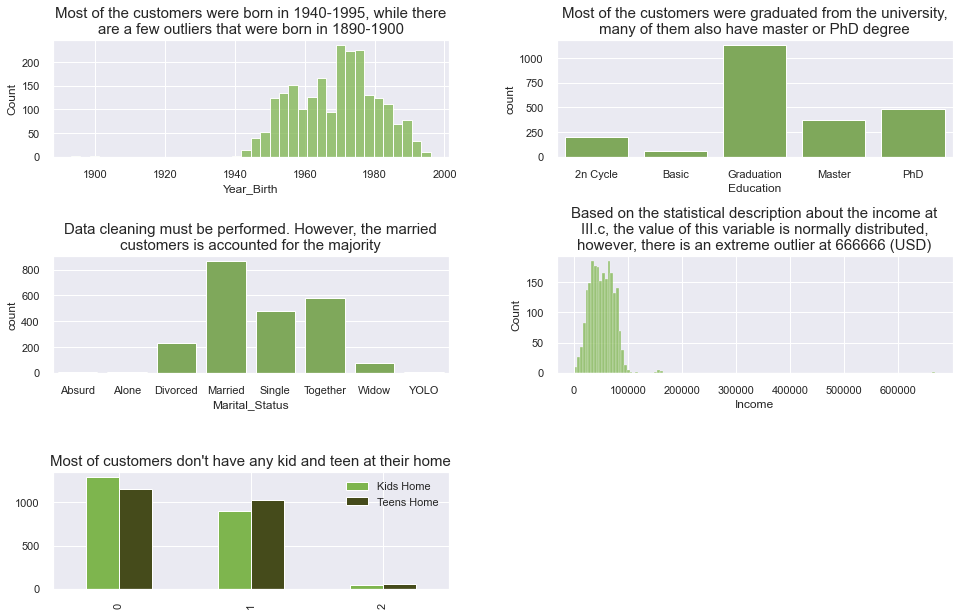

In [8]:
sns.set_style("whitegrid")
sns.set(font_scale=1.0)
fig, axes = plt.subplots(3,2, figsize=(15,10))
fig.tight_layout(pad=6.0)

#distribution of years of birth
sns.histplot(df['Year_Birth'], color='#7eb54e', ax=axes.flat[0])
axes.flat[0].set_title("\n".join(wrap('Most of the customers were born in 1940-1995, while there are a few outliers that were born in 1890-1900',60)),fontsize=15)

#distribution of the education
sns.countplot(df['Education'], color='#7eb54e', ax=axes.flat[1])
axes.flat[1].set_title("\n".join(wrap('Most of the customers were graduated from the university, many of them also have master or PhD degree',60)),fontsize=15)

#distribution of the marial_status
sns.countplot(df['Marital_Status'], color='#7eb54e', ax=axes.flat[2])
axes.flat[2].set_title("\n".join(wrap('Data cleaning must be performed. However, the married customers is accounted for the majority',60)),fontsize=15)

#distribution of income
sns.histplot(df['Income'], color='#7eb54e', ax=axes.flat[3])
axes.flat[3].set_title("\n".join(wrap('Based on the statistical description about the income at III.c, the value of this variable is normally distributed, however, there is an extreme outlier at 666666 (USD)',60)), fontsize=15)

#distribution of number of kids and teens
teen = df['Teenhome'].value_counts()
kid = df['Kidhome'].value_counts()
temp = pd.DataFrame({0:[kid[0],teen[0]], 1:[kid[1],teen[1]], 2:[kid[2],teen[2]]},index=['Kids Home', 'Teens Home']).T
temp.plot(kind='bar', color=['#7eb54e','#454B1B'], ax=axes.flat[4])
axes.flat[4].set_title("\n".join(wrap("Most of customers don't have any kid and teen at their home",60)), fontsize=15)

#remove the empty plot
fig.delaxes(axes[2][1])

<i> e.2.About Customer's Loyalty: Distribution of the recency and whether they have complaint about the service </i>

Text(0.5, 1.0, 'Nearly 100% of customers never complain about the service at\nthe shop')

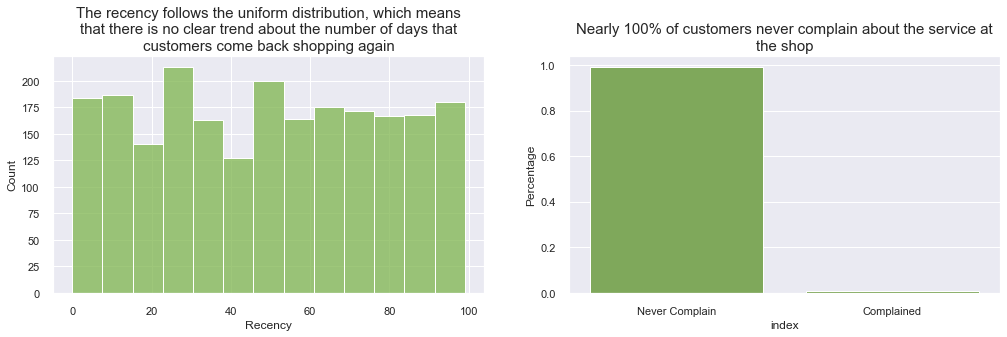

In [9]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.tight_layout(pad=4.0)

#distribution of recency
sns.histplot(df['Recency'], color='#7eb54e', ax=axes.flat[0])
axes.flat[0].set_title("\n".join(wrap('The recency follows the uniform distribution, which means that there is no clear trend about the number of days that customers come back shopping again',60)),fontsize=15)

#distribution of complain
temp = df['Complain'].value_counts(normalize=True).reset_index()
temp['index'] = temp['index'].replace(0,'Never Complain').replace(1,'Complained')
sns.barplot(data=temp, x='index', y='Complain', color='#7eb54e', ax=axes.flat[1])
axes.flat[1].set_ylabel('Percentage')
axes.flat[1].set_title("\n".join(wrap('Nearly 100% of customers never complain about the service at the shop',60)),fontsize=15)


<i> e.3.About Product: Distribution of product categories </i>

Text(0.5, 1.0, 'The wine product takes accounted for above 50% of the product sold followed by the meat product')

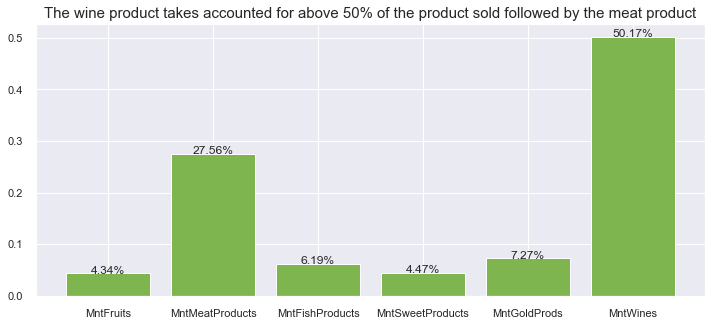

In [10]:
products = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' , 'MntWines']
temp = df[products].sum().reset_index()
temp.columns = ['product', 'sum']
temp['proportion'] = temp['sum']/sum(temp['sum'])


plt.figure(figsize=(12,5))

#plot the proportion
plt.bar(data=temp, x='product', height='proportion',color='#7eb54e')
for i in range(len(temp['product'])):
    plt.text(i, temp['proportion'][i], str(round(temp['proportion'][i]*100,2)) + "%", ha = 'center')
plt.title("\n".join(wrap('The wine product takes accounted for above 50% of the product sold followed by the meat product',100)),fontsize=15)

<i> e.4.About Product: The consumption of product categories by the customers' demography </i>

([], [])

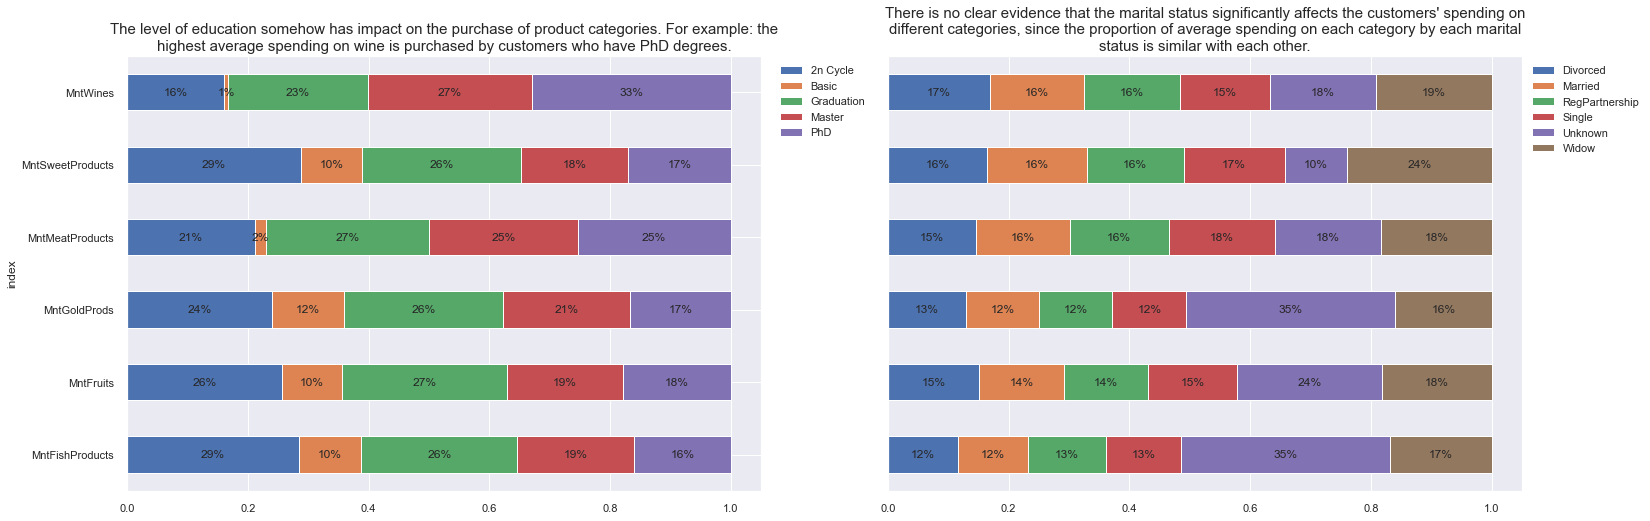

In [11]:
fig, axes = plt.subplots(1,2, figsize=(25,8))

#The relation of the average spending on every product categories by education
products = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' , 'MntWines']
temp = df.groupby('Education')[products].mean().reset_index().T
temp.columns = temp.iloc[0]
temp = temp[1:]
temp = temp.reset_index()
temp_melt = temp.melt(id_vars='index', value_vars=['2n Cycle','Basic','Graduation','Master','PhD'])
temp_melt['value'] = temp_melt['value'].astype(float)
crosstab = pd.crosstab(index=temp_melt['index'], columns=temp_melt['Education'], values=temp_melt['value'], aggfunc='mean', normalize='index')
ax = crosstab.plot(kind='barh', rot=0, stacked=True, ax=axes.flat[0])
for c in ax.containers:
    labels = [str(round(w*100)) + "%" if (w := v.get_width()) > 0 else '' for v in c ]
    ax.bar_label(c, labels=labels, label_type='center')
ax.legend(bbox_to_anchor=(1.18, 1), loc='upper right')
axes.flat[0].set_title("\n".join(wrap('The level of education somehow has impact on the purchase of product categories. For example: the highest average spending on wine is purchased by customers who have PhD degrees.',100)),fontsize=15)

#The relation of the average spending on every product categories by education
df['Marital_Status'] = df['Marital_Status'].replace('Alone','Single').replace(['Absurd','YOLO'],'Unknown').replace('Together','RegPartnership')
products = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' , 'MntWines']
temp = df.groupby('Marital_Status')[products].mean().reset_index().T
temp.columns = temp.iloc[0]
temp = temp[1:]
temp = temp.reset_index()
temp_melt = temp.melt(id_vars='index', value_vars=['Married','RegPartnership','Single','Divorced','Widow','Unknown'])
temp_melt['value'] = temp_melt['value'].astype(float)
crosstab = pd.crosstab(index=temp_melt['index'],
                             columns=temp_melt['Marital_Status'],
                             values=temp_melt['value'],
                             aggfunc='mean',
                             normalize='index'
                             )
ax1 = crosstab.plot(kind='barh', rot=0, stacked=True, ax=axes.flat[1])
for c in ax1.containers:
    labels = [str(round(w*100)) + "%" if (w := v.get_width()) > 0 else '' for v in c ]
    ax1.bar_label(c, labels=labels, label_type='center')
ax1.legend(bbox_to_anchor=(1.1, 1), loc='upper center')
axes.flat[1].set_title("\n".join(wrap("There is no clear evidence that the marital status significantly affects the customers' spending on different categories, since the proportion of average spending on each category by each marital status is similar with each other.",100)),fontsize=15)
axes.flat[1].set_ylabel('')
plt.yticks([])

<i> e.4.About Product: The consumption of product categories by the customers' income and year of birth</i>

Text(0.5, 1.0, "There is no abvious about the correlation between customers' year of birth and their spending on\neach product category")

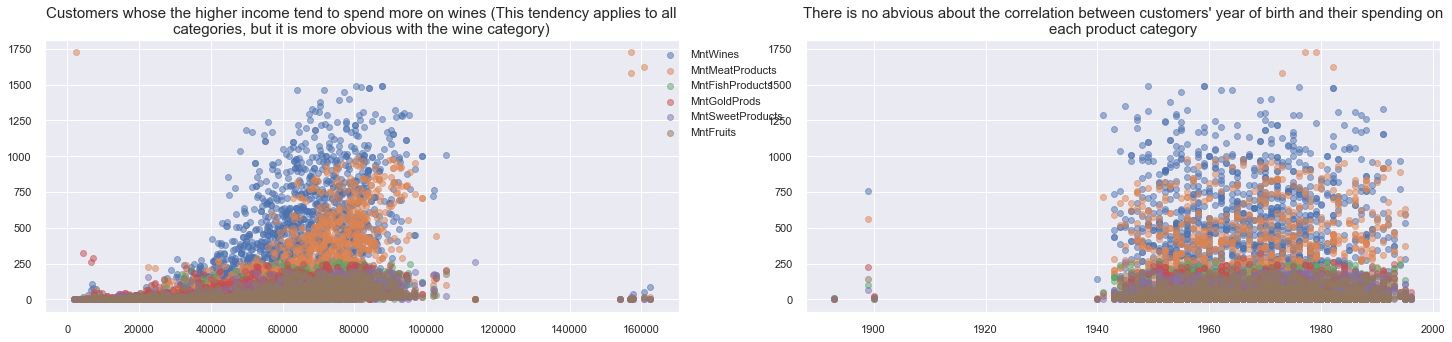

In [12]:
fig, axes = plt.subplots(1,2,figsize=(25,5))

#remove the outlier
temp = df[df['Income'] < 600000]

products = ['MntFruits', 'MntSweetProducts', 'MntGoldProds' , 'MntFishProducts', 'MntMeatProducts','MntWines']
#MntWines
for i in products[::-1]:
    axes.flat[0].scatter(x=temp['Income'], y=temp[i], alpha=0.5, label=i)
axes.flat[0].legend(loc='upper right', bbox_to_anchor=(1.18, 1))
axes.flat[0].set_title("\n".join(wrap('Customers whose the higher income tend to spend more on wines (This tendency applies to all categories, but it is more obvious with the wine category) ',100)),fontsize=15)

#year of birth
for i in products[::-1]:
    axes.flat[1].scatter(x=temp['Year_Birth'], y=temp[i], alpha=0.5, label=i)
axes.flat[1].set_title("\n".join(wrap("There is no abvious about the correlation between customers' year of birth and their spending on each product category",100)),fontsize=15)



<i> e.5.About Product: The consumption of product categories by whether the customers have complained</i>

Text(0.5, 1.0, 'Customers spending on buying fruits have complained the most')

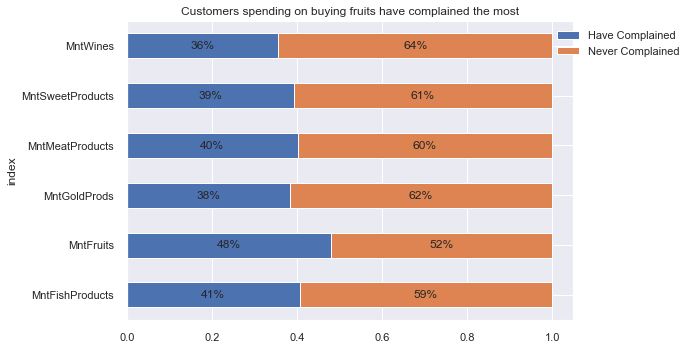

In [13]:
products = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' , 'MntWines']
temp = df.groupby('Complain')[products].mean().reset_index().T
temp.columns = ['Never Complained', 'Have Complained']
temp = temp[1:]
temp = temp.reset_index()
temp_melt = temp.melt(id_vars='index', value_vars=['Never Complained','Have Complained'])
temp_melt['value'] = temp_melt['value'].astype(float)
crosstab = pd.crosstab(index=temp_melt['index'], columns=temp_melt['variable'], values=temp_melt['value'], aggfunc="mean", normalize='index')
ax = crosstab.plot(kind='barh', rot=0, stacked=True) 
for c in ax.containers:
    labels = [str(round(w*100)) + "%" if (w := v.get_width()) > 0 else '' for v in c ]
    ax.bar_label(c, labels=labels, label_type='center')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper center')
plt.title("\n".join(wrap('Customers spending on buying fruits have complained the most',100)))

<i> e.6.About Promotion: The rate of customer bought products with the promotion</i>

Text(0.5, 1.0, 'The most recent promotion campaign has the highest reponse rate from customers')

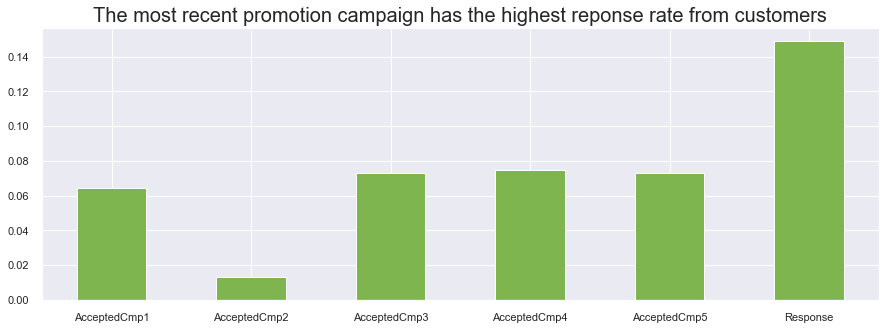

In [14]:
plt.figure(figsize=(15,5))

#distribution
promotion = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
temp = df[promotion].sum() / len(df)
temp = temp.replace('Response', 'Current Campaign')
temp.plot(kind='bar',rot=0,color='#7eb54e')
plt.title("\n".join(wrap('The most recent promotion campaign has the highest reponse rate from customers',100)), fontsize='20')

<i> e.7.About Place: The proportion of place where customers make the purchase</i>

Text(0.5, 1.0, 'Most of the customer purchase through the brick-and-mortar store')

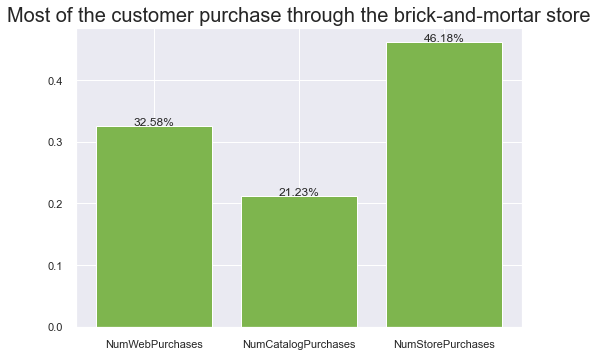

In [15]:
place = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
temp = df[place].sum().reset_index()
temp.columns = ['index','value']
temp['percentage'] = temp['value']/sum(temp['value'])
plt.bar(data=temp, x='index', height='percentage', color='#7eb54e')
for i in range(len(temp['index'])):
    plt.text(i, temp['percentage'][i], str(round(temp['percentage'][i]*100,2)) + "%", ha = 'center')
plt.title("\n".join(wrap('Most of the customer purchase through the brick-and-mortar store',100)), fontsize='20')

<h5 id='clean-dataset'> IV. PREPARE THE DATASET </h5>

<h8 id='missing-data'> a. Handle missing data </h8>

<AxesSubplot:>

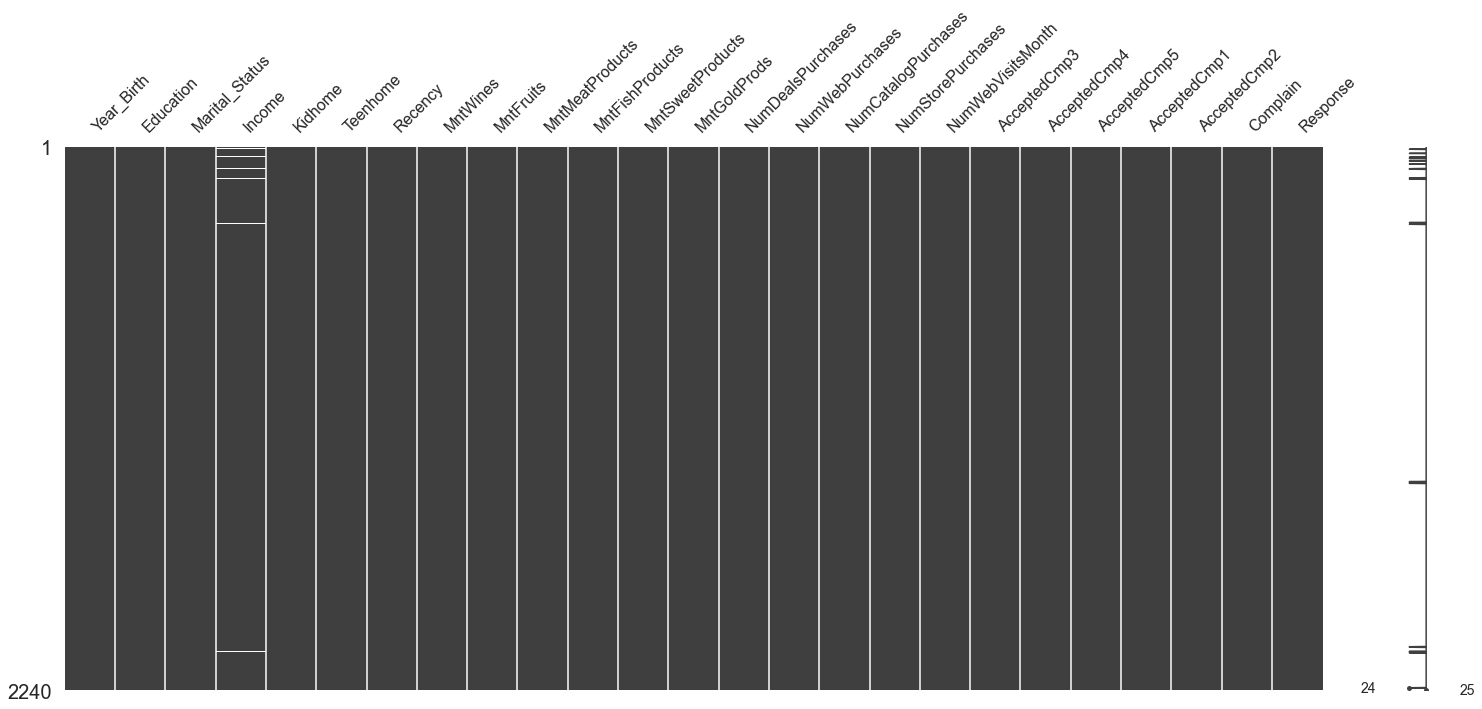

In [16]:
msno.matrix(df)

In [17]:
df[df['Income'].isnull()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1983,Graduation,Married,NaN,1,0,11,5,5,6,...,0,2,7,0,0,0,0,0,0,0
27,1986,Graduation,Single,NaN,1,0,19,5,1,3,...,0,0,1,0,0,0,0,0,0,0
43,1959,PhD,Single,NaN,0,0,80,81,11,50,...,3,4,2,0,0,0,0,0,0,0
48,1951,Graduation,Single,NaN,2,1,96,48,5,48,...,1,4,6,0,0,0,0,0,0,0
58,1982,Graduation,Single,NaN,1,0,57,11,3,22,...,0,3,6,0,0,0,0,0,0,0
71,1973,2n Cycle,Married,NaN,1,0,25,25,3,43,...,0,3,8,0,0,0,0,0,0,0
90,1957,PhD,Married,NaN,2,1,4,230,42,192,...,2,8,9,0,0,0,0,0,0,0
91,1957,Graduation,Single,NaN,1,1,45,7,0,8,...,0,2,7,0,0,0,0,0,0,0
92,1973,Master,RegPartnership,NaN,0,0,87,445,37,359,...,4,8,1,0,0,0,0,0,0,0
128,1961,PhD,Married,NaN,0,1,23,352,0,27,...,1,7,6,0,0,0,0,0,0,0


There is no special pattern in the customers that have no information about income. Therefore, their income will be considered as the median of the sample.

In [18]:
df['Income'] = df['Income'].fillna(df['Income'].median())

<h8 id='bad-data-value'> b. Handle unapproriate data value </h8>


During the data exploration analysis, the Marital_status has some values that do not make sense. Therefore, we clean these values to make sure every value has some meanings.

 In particular, the category "Alone" is the same with "Single". "Absurb" and "YOLO" have no particular meaning in term of marital status. Therefore, these two categories are replaced by "Unknown". Besides, instead of using the word "Together", it is not clear. This project will suppose this word refers to registered partnership.

In [19]:
df['Marital_Status'] = df['Marital_Status'].replace('Alone','Single').replace(['Absurd','YOLO'],'Unknown').replace('Together','RegPartnership')

In [20]:
temp = pd.DataFrame(df[category[1]].value_counts())
temp

,Marital_Status
Married,864
RegPartnership,580
Single,483
Divorced,232
Widow,77
Unknown,4


The "Unknown" value only makes up for 4 customers in the dataset, which is a small proportion. Because it has no meanings, this value is removed from the dataset.

In [21]:
df = df[df['Marital_Status'] != 'Unknown']


<h8 id='outlier'> c. Handle outliers </h8>

Through the data exploratory analysis, there are two attributes with significant outliers. In particular: year of birth and income:

Text(0.5, 1.0, 'The outliers are customers where born before 1920')

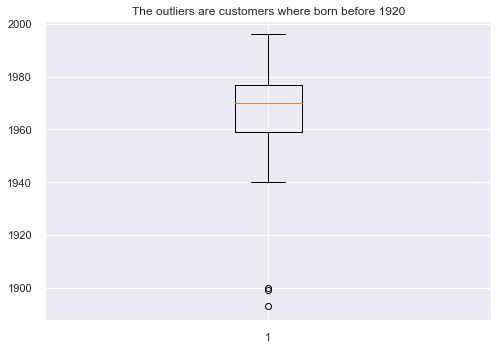

In [22]:
plt.boxplot(df['Year_Birth'])
plt.title('The outliers are customers where born before 1920')

In [23]:
len(df[df['Year_Birth'] < 1920])

3

There are only 3 customers born before 1920, so we can remove this record without losing to much data.

In [24]:
df = df[df['Year_Birth'] >= 1920]

Besides, there is a customer whose income is 666666 USD. This number sounds unnatural and substantially higher than others' income. So this record needs to be deleted from the dataset.

In [25]:
df = df[df['Income'] < 600000]

<h8 id='feature-eng'> d. Feature Engineering </h8>


There is some interesting features can be extracted from the dataset. With these new features, we hope that the algoritm will have more information to produce the more accurate results. The new features created is: 
- Total Spending: The total expense a customer spent to buy products.
- Total Purchase: The number of purchase a customer made.
- Web Conversion Rate: If a customer visits the web, what is the percentage that he/she will order online throught that website.
- Family Member: Based on the marital status and the kids and teenagers in home, how many people is the customer living with.
- Age: Convert the age from the year of birth

1. Total spending


In [26]:
df['Total_Spending'] = df[products].sum(axis=1)

2. Total purchase

In [27]:
df['Total_purchase'] = df[place].sum(axis=1)

3. Web Conversion Rate

In [28]:
df['conversion_rate'] = df['NumWebPurchases'][i] / df['NumWebVisitsMonth'][i]  
df['conversion_rate'] = df['conversion_rate'].fillna(0)

4. Family Members

In [29]:
df['HomeMember'] = df['Teenhome'] + df['Kidhome']
df.loc[df['Marital_Status'].isin(['Married','RegPartnership']),'HomeMember'] = df.loc[df['Marital_Status'].isin(['Married','RegPartnership']),'HomeMember'] + 2
df.loc[~df['Marital_Status'].isin(['Married','RegPartnership']),'HomeMember'] = df.loc[~df['Marital_Status'].isin(['Married','RegPartnership']),'HomeMember'] + 1

In [30]:
df[['Marital_Status','Kidhome','Teenhome','HomeMember']]

,Marital_Status,Kidhome,Teenhome,HomeMember
0,Single,0,0,1
1,Single,1,1,3
2,RegPartnership,0,0,2
3,RegPartnership,1,0,3
4,Married,1,0,3
...,...,...,...,...
2235,Married,0,1,3
2236,RegPartnership,2,1,5
2237,Divorced,0,0,1
2238,RegPartnership,0,1,3


5. From YearBirth to Age

The dataset is uploaded in 2021. Therefore, this project uses this year to calculate the age of customers at the year of 2021.

In [31]:
df['age'] = 2021 - df['Year_Birth']
df.drop('Year_Birth',axis=1, inplace=True)

6. Total Promotion

In [32]:
df['total_promotion'] = df[promotion].sum(axis=1)
df_s = df.copy()

<h8 id='standard'> e. Standardization </h8>


In clustering problem, standardization prevents features with a larger scale affecting the clustering process too significant. Therefore, it basically scale every numerical features so that these features have the normal distribution with the mean equal to 0 and the standard deviation equal to 1. With standardization, all features in the algorithm is equally important and the algorithm consequently reach the convergence faster.

In [33]:
standard = ['Income','Kidhome','Teenhome','Recency','NumDealsPurchases'] + products + place + ['NumWebVisitsMonth','Total_Spending','Total_purchase','HomeMember','age']
scale = StandardScaler()
df[standard] = scale.fit_transform(df[standard])


<h8 id='encode-cat'> f. Encode categorical values </h8>


The clustering algorithm have to consider the distance between every records in the dataset, which is only calculated with numerical value. Therefore, every categorical attribute is needed to be converted to numerical value. There are usually 2 ways to convert categorical value to numerical value for the clustering task: label encoding and one-hot encoding. Since the label encoding creates a hiararchy between the value in a categorical features, while we want to treat every value equally, we use the one-hot encoding so that every value in a categorical attributes will be considered as equally important.

In [34]:
category = ['Education','Marital_Status']
df = pd.get_dummies(df)

<h8 id='pca'> g. Principal Component Analysis (PCA)</h8>


PCA is an unsupervised machine learning techniques used to reduce data dimensionality. It chooses a low-dimensional set of features from a higher-dimensional set of features while preserving as much as information as possible. It is used to feature selection and visualizing higher-dimensional data. 

The most common of PCA is to visualize the pattern and relationship of the data. When the dataset does not have much attribute, the scatterplot is a popular and simple chart to chose. However, because the scatterplot only allows to visualize 2 attributes as the same time, when the dataset contains many attributes, there will be to much scatterplots needed to be generate - this is also unconvenient for observations and intepretation of the data.

The first principal component of a set of features is the normalized linear combination of the features that has the largest variance.

The second principal component is the normalized linear combination that has the maximum variance out of all linear combinations that are uncorrelated with the first pricinpal component Z.

Then we visualize the PC1 and PC2 to create the plot that summarize the pattern of the dataset.

Study more: https://rpubs.com/cyobero/pca-clustering

In [35]:
pca = PCA(n_components = 3)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["PC1","PC2", "PC3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2232.0,-2.037399e-16,2.883310,-5.688285,-2.697920,-0.673605,2.492385,7.882684
PC2,2232.0,3.820122e-17,1.529946,-3.674847,-1.280820,-0.127206,1.091904,5.520567
PC3,2232.0,5.968941e-17,1.139503,-4.209689,-0.817596,0.002107,0.754582,5.054951


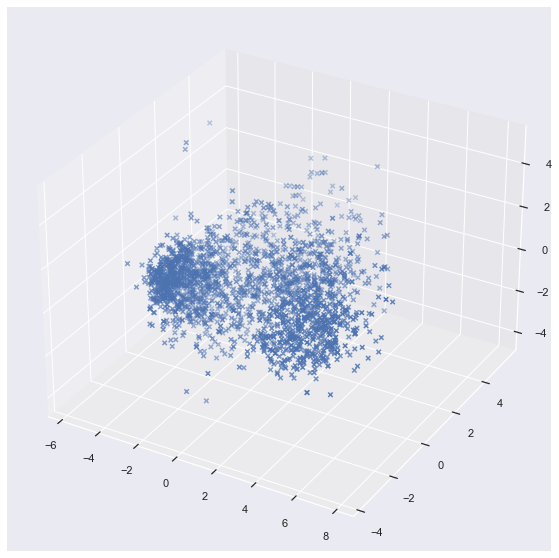

In [36]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(PCA_ds['PC1'], PCA_ds['PC2'], PCA_ds['PC3'], 'gray', marker='x')

<h5 id='fit-model'> V. FIT THE MODEL </h5>

First and foremost, it is important to emphasize this is an unsupervised problem. In particular, the problem requires us to group data into some clusters so that there is a minumum difference between the datapoints in each cluster and there is a maximum difference between each cluster so that we can discover some underlying pattern of the dataset. 

Apply in the context of the problem, we want our cluster will reflect some characteristics so that customers is segmented clearly and each cluster of customer reflects a significant pattern of that group. For example, the desired result can be some clusters that divide customers perfectly by education level, marital status and income. Based on these clusters, the company can formulate a strategy to improve the service or focus the business on each customer segment.

There are 3 popular clustering algorithms applied in this project:

1. K-means clustering
2. Agglomerative clustering

These algorithms are usually applied because they are commonly-used algorithms for the cluster analysis.

After fitting the data with these models, we will evaluate the effectiveness of the model by using Silhoutte Score to choose the best performing model.

<h8 id='kmean'>a. K-means Clustering</h8>


The intuition of K-means clustering is that from n central points for k clusters, we consider that the data points with closest distance to a central point is belonged to that associated cluster. The essence of the algorithm is how to choose the central point. The algorithm achieves that by initializing k random number as central points, and then assign data points to its closest central and compute the mean of these assigned points as new central point . This process is repeated until the central points are not changed anymore. At this stage, the current central points are the desired ones.

The reason why this project applies this algorithm first is because this is a fundamental algorithm for a clustering problem. Data scientists usually use K-means to see how the dataset is segmented in the basic algorithm before stepping into more advanced things.

However, since this is a simple algorithm, there are several drawbacks:
1. We have to idenfy the number of clusters. This can be a challenge because if we don't know any pattern of the dataset, we have no idea about how manu groups needed. This number can highly impacts the way the dataset is clustered so that it needs to be taken into account seriously.
2. The result is significantly impacted by the initial centroids. Since the initial centroids are random points, and each random points can deliver very different results. Therefore, it is possible that our current result is not the most optimal one.
3. The number of datapoints in each cluster is the same. The imbalance between the quantity of values in each cluster will lead to the unaccurate result.
4. A cluster needs to have a circle shape. Because we are using the mean to identify the centroid, and the closest datapoints of a centroids will tend to form a circle with the centroid is the central, so that if we need the cluster having different shapes, K-means may not lead to a desirable outcome.
5. If a cluster lies inside a different cluster, K-means cannot differientiate this case and deliver an wanted result.


From these drawbacks, we try to address the first two drawbacks because at least now, we have no clue about how the clusters look like:
1. With the first limitation, we will apply the Elbow's Method to identify the most optimal number of clusters.
2. With the second limitation, we fit the model with many different initial centroids and then chooose the one with minimum lost function.

c:\Users\Hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

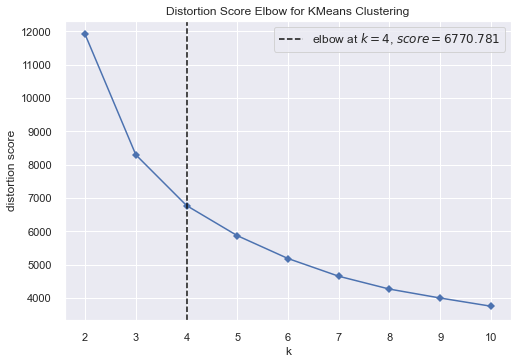

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
Elbow_M = KElbowVisualizer(KMeans(), timings=False, k = 10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In this elbow method, we use the distortion score, which is the sum of squared distances from each point to its assigned center, to evaluate the effectiveness of the model. As the visualization shown, the model is the most effective at k=4, which means 4 clusters.

After identifying the most optimal number of clusters, we will fit the dataset with the K-means model. In the model created below, we will randomly create the centroids 10 times (n_init=10) and then choose the best result. 

In [38]:
kmeans = KMeans(n_clusters = 4, init = 'random', n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(PCA_ds)

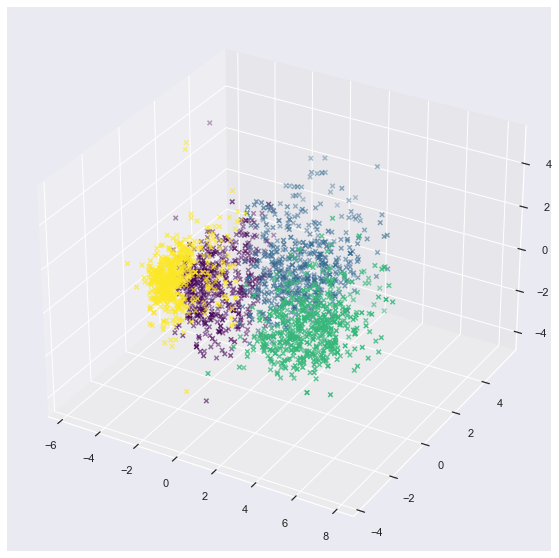

In [39]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(PCA_ds['PC1'], PCA_ds['PC2'], PCA_ds['PC3'], c=y_kmeans, marker='x', cmap='viridis')

Let's have a look on how the clusters look like:

In [40]:
def visualise_cluster(y):
    fig, axes = plt.subplots(2,4,figsize=(25,8))
    fig.tight_layout(pad=2.0)

    #income
    sns.boxplot(x=y, y=df_s['Income'], ax=axes.flat[0])
    axes.flat[0].set_title('Income', fontsize=15)

    #Total_Spending
    sns.boxplot(x=y, y=df_s['Total_Spending'], ax=axes.flat[1])
    axes.flat[1].set_title('Total_Spending', fontsize=15)

    #Total_Spending
    sns.boxplot(x=y, y=df_s['HomeMember'], ax=axes.flat[2])
    axes.flat[2].set_title('HomeMember', fontsize=15)

    #Age
    sns.boxplot(x=y, y=df_s['age'], ax=axes.flat[3])
    axes.flat[3].set_title('age', fontsize=15)

    #Vs Category
    df_s['cluster'] = y
    products = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' , 'MntWines']
    temp = df_s.groupby('cluster')[products].mean().reset_index()
    temp_melt = temp.melt(id_vars='cluster', value_vars=products)
    temp_melt['value'] = temp_melt['value'].astype(float)
    crosstab = pd.crosstab(index=temp_melt['cluster'], columns=temp_melt['variable'], values=temp_melt['value'], aggfunc='mean', normalize='index')
    ax = crosstab.plot(kind='bar', rot=0, stacked=True, ax=axes.flat[4])
    axes.flat[4].legend(loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=3)
    axes.flat[4].set(xlabel=None)
    axes.flat[4].set_title('Product Category', fontsize=15)


    #Education
    cross_tab = pd.crosstab(index=df_s['cluster'], columns=df_s['Education'], normalize="index")
    cross_tab.plot(kind='bar', stacked=True, ax=axes.flat[5])
    axes.flat[5].set_title('Education', fontsize=15)
    axes.flat[5].legend(loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=3)

    #Marital Status
    cross_tab = pd.crosstab(index=df_s['cluster'], columns=df_s['Marital_Status'], normalize="index")
    cross_tab.plot(kind='bar', stacked=True, ax=axes.flat[6])
    axes.flat[6].set_title('Marital_Status', fontsize=15)
    axes.flat[6].legend(loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=3)

    #Complain
    df_s['cluster'] = y
    products = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
    temp = df_s.groupby('cluster')[products].mean().reset_index()
    temp_melt = temp.melt(id_vars='cluster', value_vars=products)
    temp_melt['value'] = temp_melt['value'].astype(float)
    crosstab = pd.crosstab(index=temp_melt['cluster'], columns=temp_melt['variable'], values=temp_melt['value'], aggfunc='mean', normalize='index')
    ax = crosstab.plot(kind='bar', rot=0, stacked=True, ax=axes.flat[7])
    axes.flat[7].legend(loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=2)
    axes.flat[7].set(xlabel=None)
    axes.flat[7].set_title('Place', fontsize=15)


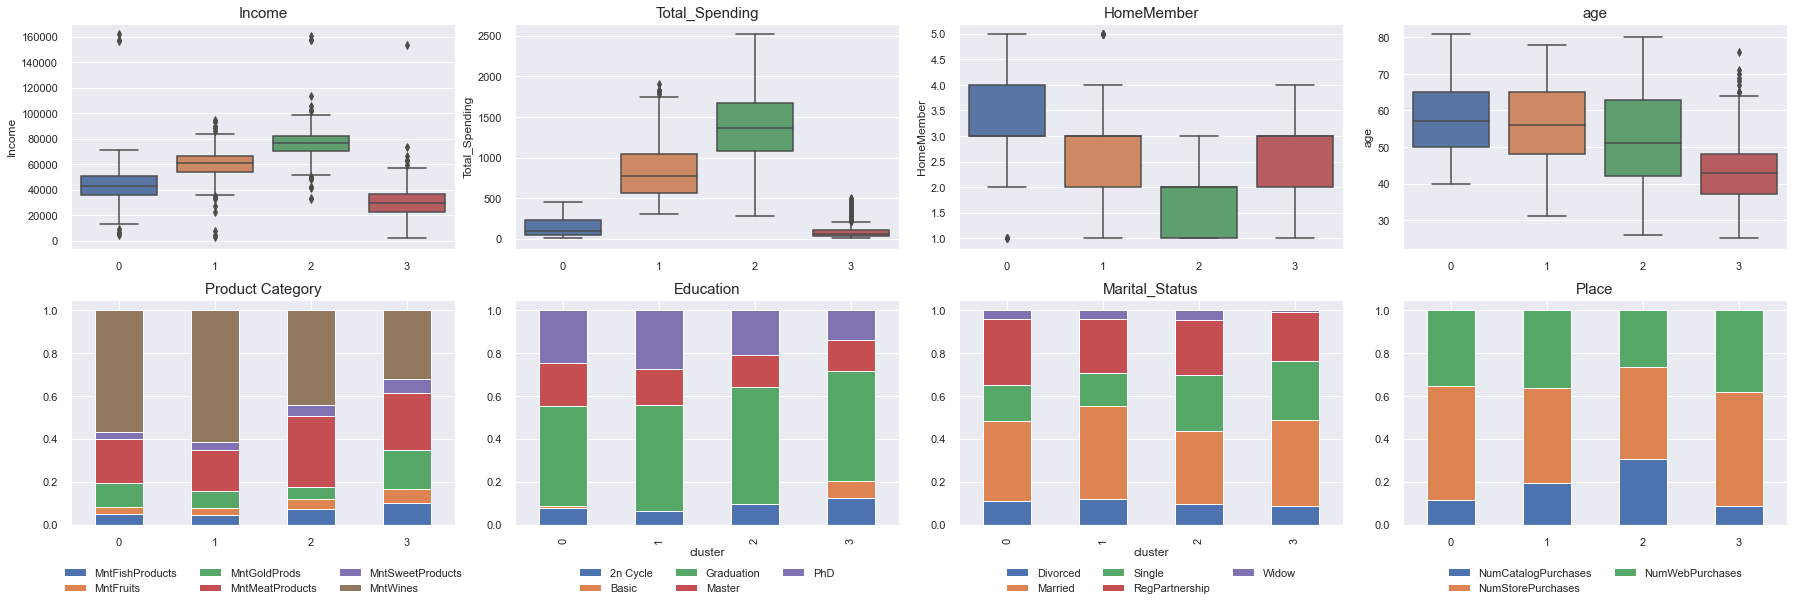

In [41]:
visualise_cluster(y_kmeans)



<h8 id='agglo'>b. Agglomerative clustering</h8>

Agglomerative clustering is a type of hierarchical clustering: bottom-up approach. The way this algorithm works is to firstly treat each single datapoint as a cluster, then create a pair of cluster based on their similarities until all clusters are merged into a big cluster containing all data points. This process creates a dendogram - a tree-based representation that shows the hierarchical relationship between objects. 

In the agglomerative clustering algorithm, we have to decide the cluster linkage - the metric used to calculate the similarity and disimilirity between each datapoints and clusters. We will try 4 commonly used linkages: complete-linkage clustering, single-linkage clustering, unweighted average linkage clustering (UPGMA) and Ward's linkage.

Agglomerative Clustering can overcome a major problem of K-means clustering: require a specific number of cluster. Since the agglomerative clustering will simply stop when the whole data becomes a cluster, there is no need to figure out the optimal number of cluster anymore. However, in coding, we still have to specify this number to get the result because if we don't, the result will just the last cluster, which means a whole dataset. To choose this number, we use the visualisation of a dendogram. In dendogram, the height of the cluster is the distance between two merged clusters, then the number of cluster will decided by the threshold that cutting the tallest vertical line.

b.1 Ward's linkage

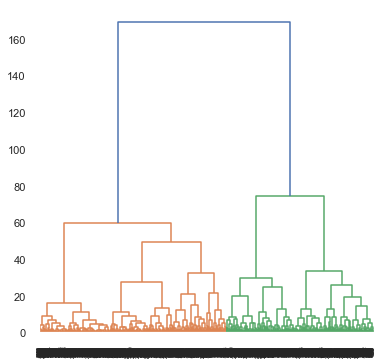

In [42]:
clusters = hierarchy.linkage(PCA_ds, method="ward")
plt.figure(figsize=(6, 6))
dendrogram = hierarchy.dendrogram(clusters)

From this visual, we can see the threshold should be set from 80 to 160, to cut the tallest vertical line of the dendogram. As the result, the chosen number of cluster is 2.

In [43]:
clustering_model_ward = AgglomerativeClustering(n_clusters = 2, linkage = "ward")
yaggloclustering_ward = clustering_model_ward.fit_predict(PCA_ds)

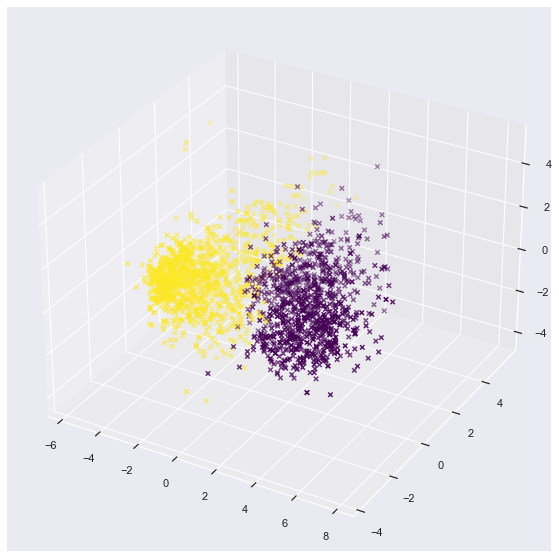

In [44]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(PCA_ds['PC1'], PCA_ds['PC2'], PCA_ds['PC3'], c=yaggloclustering_ward, marker='x', cmap='viridis')

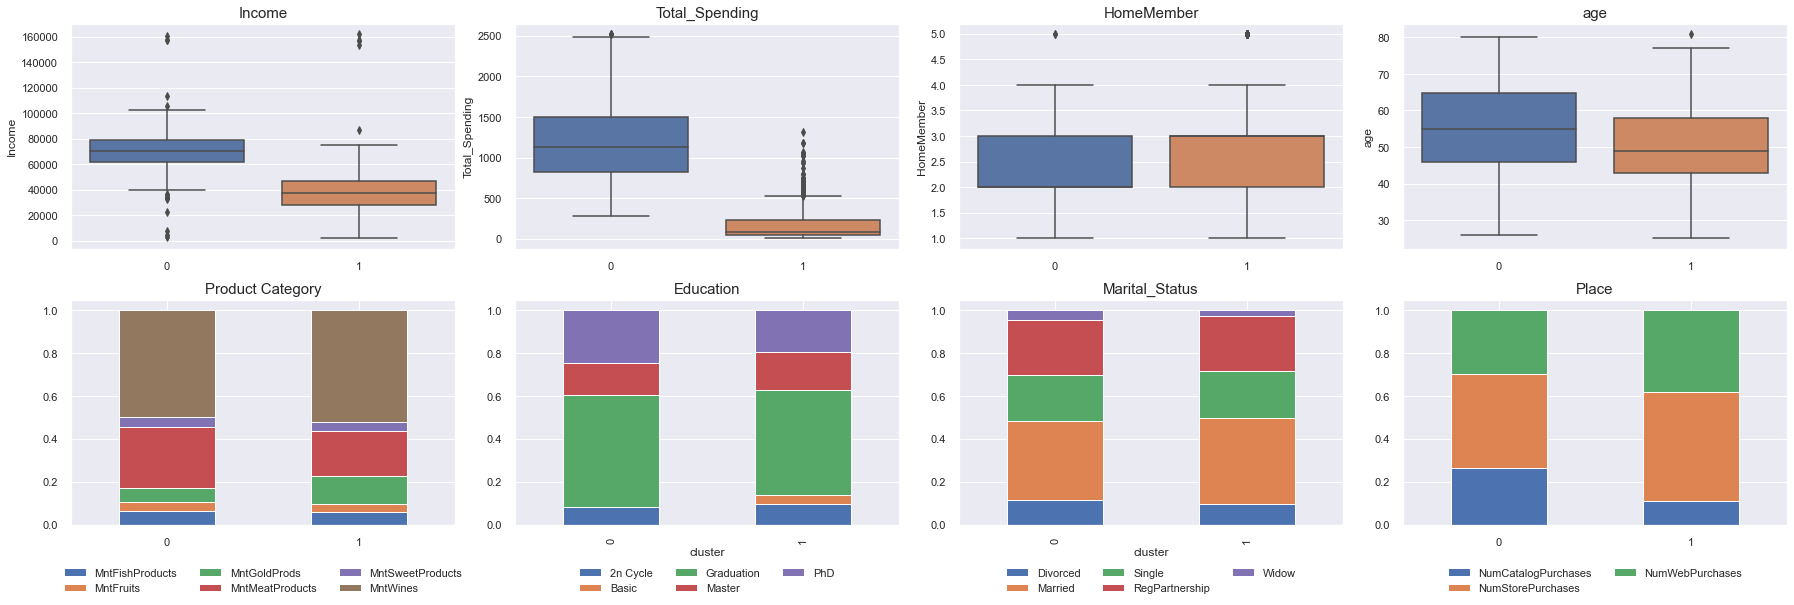

In [45]:
visualise_cluster(yaggloclustering_ward)

b.2 UPGMA

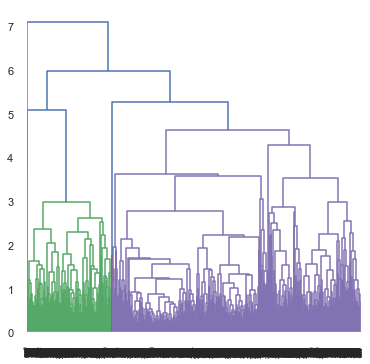

In [46]:
clusters = hierarchy.linkage(PCA_ds, method="average")
plt.figure(figsize=(6, 6))
dendrogram = hierarchy.dendrogram(clusters)

In [47]:
clustering_model_average = AgglomerativeClustering(n_clusters = 4, linkage = "average")
yaggloclustering_average = clustering_model_average.fit_predict(PCA_ds)

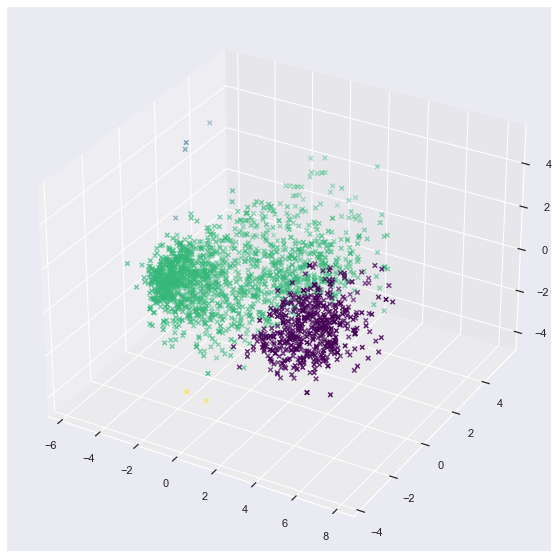

In [48]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(PCA_ds['PC1'], PCA_ds['PC2'], PCA_ds['PC3'], c=yaggloclustering_average, marker='x', cmap='viridis')

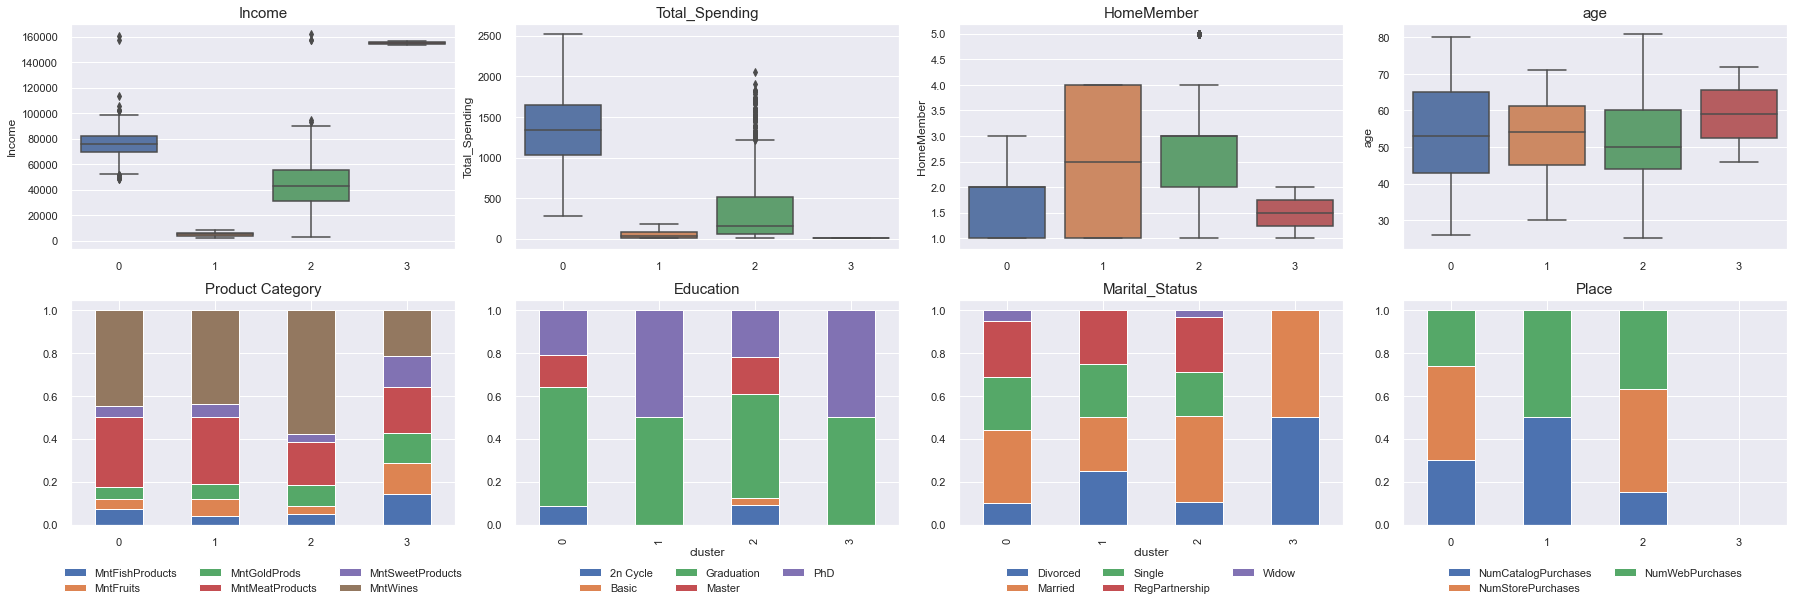

In [49]:
visualise_cluster(yaggloclustering_average)

b.3 Single linkage clustering

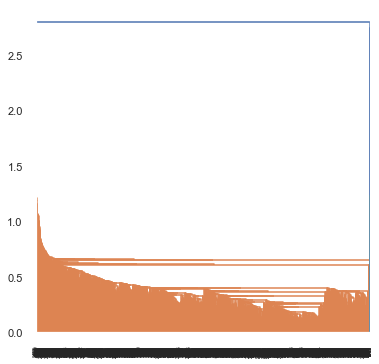

In [50]:
clusters = hierarchy.linkage(PCA_ds, method="single")
plt.figure(figsize=(6, 6))
dendrogram = hierarchy.dendrogram(clusters)

The dendogram implies that this type of linkage is unappropriate for this dataset because there is only one clear cluster in the dendogram.

b.4 Complete-linkage clustering

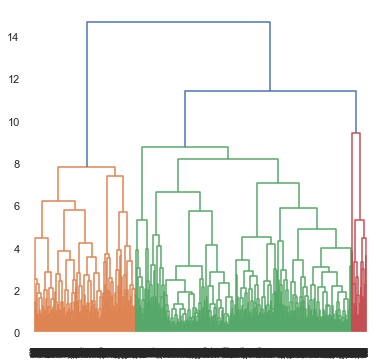

In [51]:
clusters = hierarchy.linkage(PCA_ds, method="complete")
plt.figure(figsize=(6, 6))
dendrogram = hierarchy.dendrogram(clusters)

In [52]:
clustering_model_complete = AgglomerativeClustering(n_clusters = 3, linkage = "complete")
yaggloclustering_complete = clustering_model_complete.fit_predict(PCA_ds)

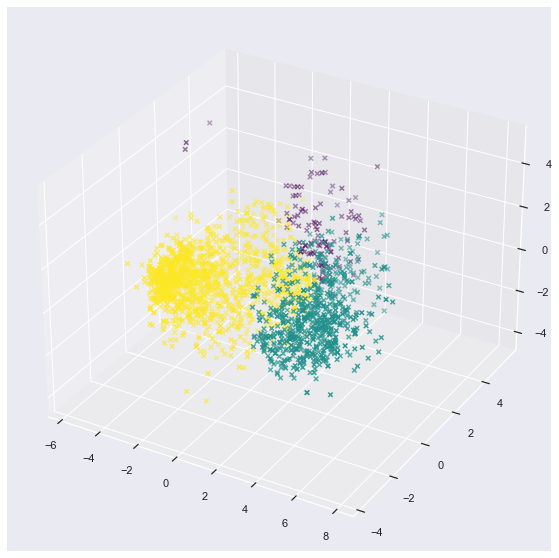

In [53]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(PCA_ds['PC1'], PCA_ds['PC2'], PCA_ds['PC3'], c=yaggloclustering_complete, marker='x', cmap='viridis')

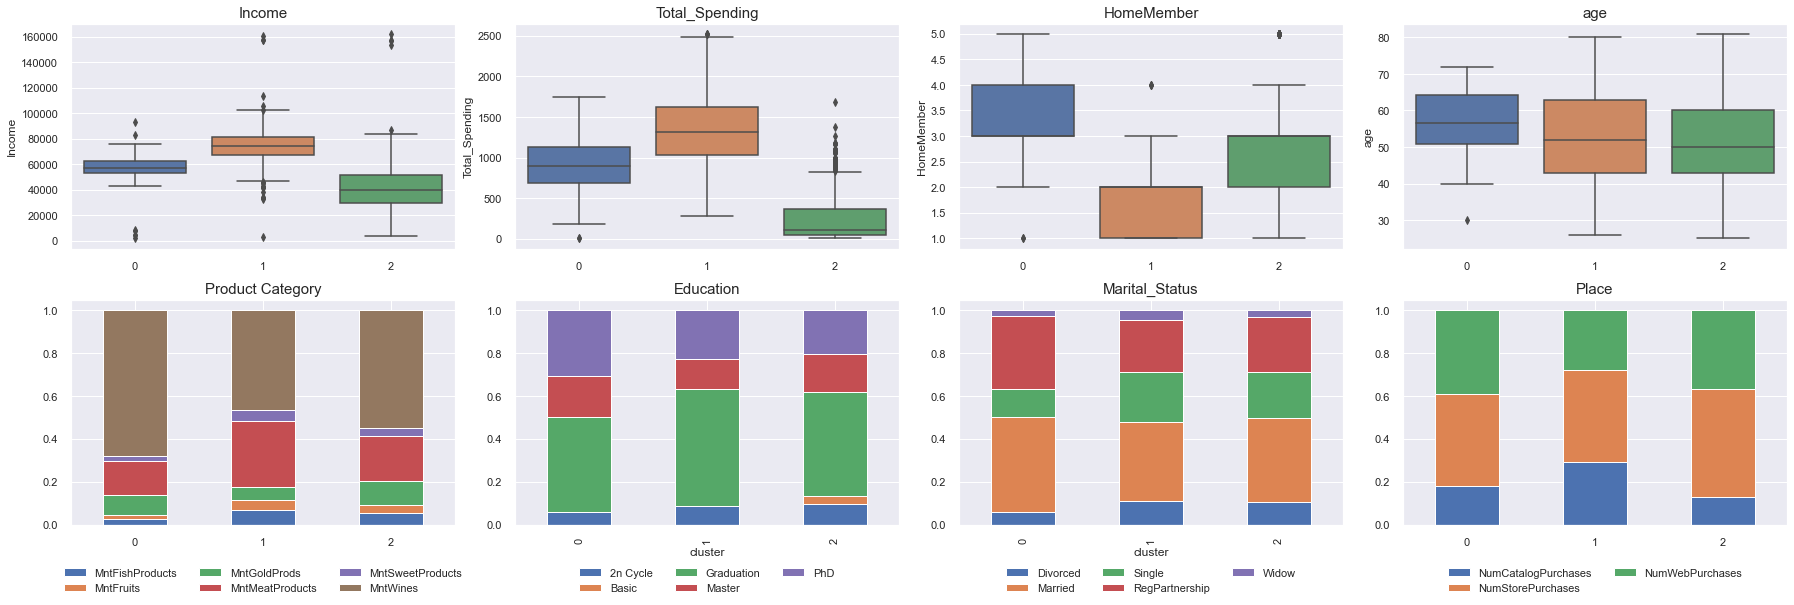

In [54]:
visualise_cluster(yaggloclustering_complete)

<h5 id='evaluate-cluster'> VI. EVALUATE THE CLUSTER </h5>

Now, we have created 4 groups of clusters using K-means Algorithm and Agglomerative Algorithm with different cluster linkages. These produces: y_kmeans, yaggloclustering_ward, yaggloclustering_average, and yaggloclustering_complete. In this section, each result is evaluated to analyse the efficiency of the algorithm and which group of cluster should be used.

<h8 id='tendency'>a. Cluster Tendency</h8>


There is a major problem of the clustering methods in unsupervised machine learning: the algrithm always returns clusters even thought the dataset doesn't have anyone by itself.  Therefore, it is important to examine whether the dataset has meaningful clusters. This process is the assessing of clustering tendency. One of the method for this assessment is the Hopkin's Statistic,

Hopkins statistic is used to measure the probability that a given dataset is generated by a uniform data distribution. It has the formula as followed:

 $ H = \frac{\sum\limits_{i=1}^ny_i}{\sum\limits_{i=1}^nx_i + \sum\limits_{i=1}^ny_i} $ 

In this formula:
- The set of x is the set of distance between the datapoint in the dataset and its closest datapoint.
- The set of y is the set of distance between the datapoint in the uniform-distributed simulated dataset and its closest datapoint.


In [55]:
hopkins(df, df.shape[0])

0.1701648438982941

If the hopkins statistic is around 0.5, that means the distribution of our dataset and the simulated dataset is similar, so that our dataset is potentially uniformly distributed. As a rule of thumb, the hopkins statistic under 0.25 is good enough to prove the dataset has meaningful clusters. As the result revealing, our dataset has meaningful cluster, so we can keep assess the quality of our clusters. 


<h8 id='quality'>b. Clustering Quality</h8>

After making sure that our dataset contains meaningful cluster, we will have a look as each clustering result produced by different algorithms. As discussed, there are two criteria for the optimal clustering:
- Maximize the distance between different clusters (intra-cluster distance)
- Minimize the distance between different datapoints in the same cluster (inter cluster distance)

There is one metric can capture these two characteristics: Silhouette Coefficient. This metric has the following formula:

$ s = (b-a)/max(b,a) $

Where a is the intercluster distance and b is the intra cluster distance.

As the result, we have the fact that the following values of s will lead to different conclusions about the clustering:
- s = 0: The distance between cluster is not significant. There maybe an overlap between clusters.
- s = 1: The distance between cluster is high and the distance between datapoints in each cluster is low.
- s = -1: The distance between cluster is low and the distance between datapoints in each cluster is high.

In each clustering results, we look for the Silhouette Coefficient close to 1.

In [56]:
print('Clusters by K-means', silhouette_score(PCA_ds, y_kmeans))
print('Clusters by Agglomerative Clustering - Ward Linkage', silhouette_score(PCA_ds, yaggloclustering_ward))
print('Clusters by Agglomerative Clustering - Average Linkage', silhouette_score(PCA_ds, yaggloclustering_average))
print('Clusters by Agglomerative Clustering - Complete Linkage', silhouette_score(PCA_ds, yaggloclustering_complete))

Clusters by K-means 0.3661569025734523
Clusters by Agglomerative Clustering - Ward Linkage 0.46050945018935746
Clusters by Agglomerative Clustering - Average Linkage 0.2742970241217389
Clusters by Agglomerative Clustering - Complete Linkage 0.35970600384118473


The result suggests the clusters by the Agglomerative Clustering with Ward Linkage achieves the best performence in comparison with other results. Therefore, in the section below, we will try to use and intepret these clusters.

<h5 id='intepret-cluster'> VII. INTEPRET THE CLUSTER </h5>

As mentioned above, because the Agglomerative Clustering with Ward Linkage has the best clustering performance, therefore, we will take more time to intepret each cluster so we can give some insights about the clustering result.

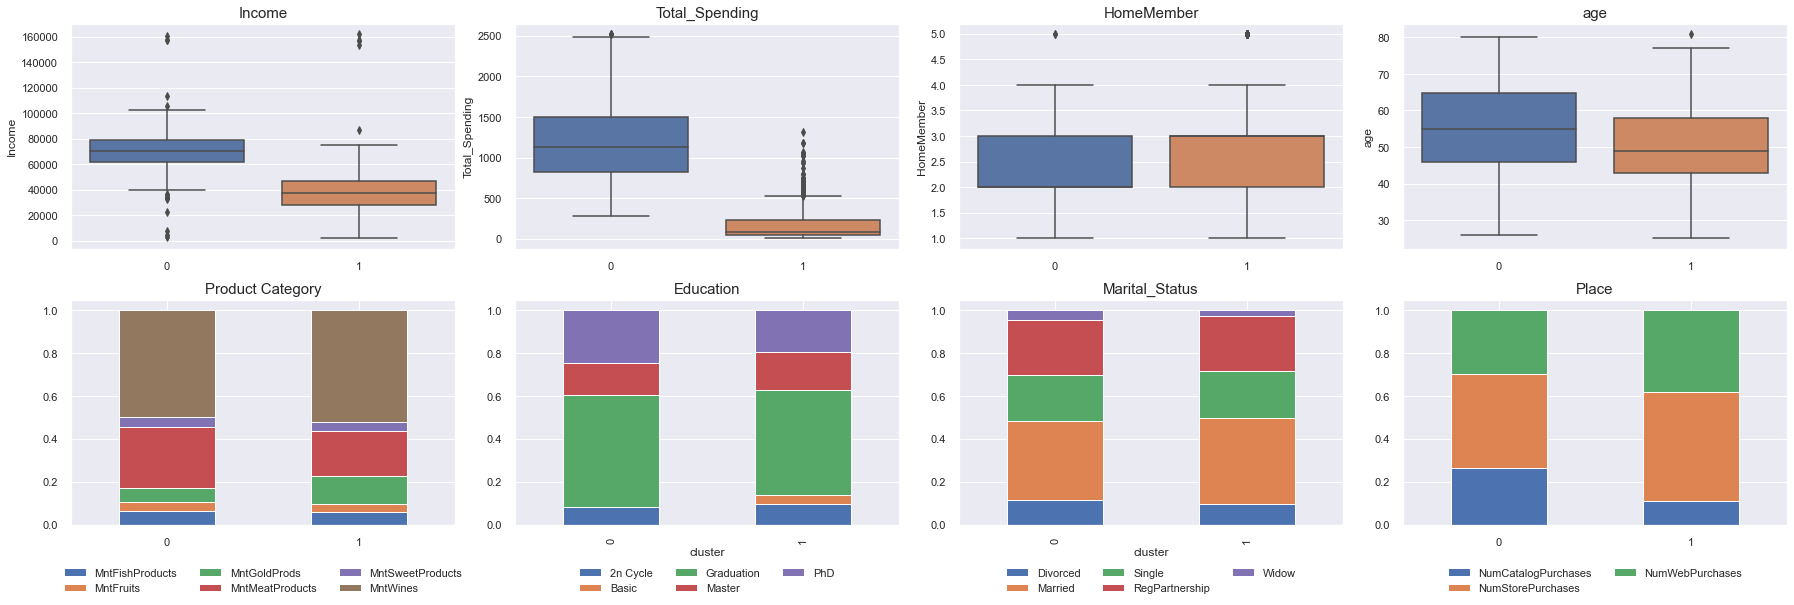

In [57]:
visualise_cluster(yaggloclustering_ward)

<table>
    <tr>
        <th> Cluster </th>
        <th> Income </th>
        <th> Total Spending </th>
        <th> Home Member </th>
        <th> Age </th>
        <th> Product Category bought </th>
        <th> Education </th>
        <th> Marital Status </th>
        <th> Place of Purchase </th>
    </tr>
    <tr>
        <td>Cluster 1</td>
        <td>Higher Income (Median: 70 000) </td>
        <td>Higher Spending (Median: 1200) </td>
        <td>Same</td>
        <td>Around 45-65</td>
        <td>Spend more on Meat</td>
        <td>Most of customers has the degree higher than graduation </td>
        <td>No significant difference </td>
        <td>Purchase on web more than another cluster, less on Catalog </td>
    </tr>
    <tr>
        <td>Cluster 2</td>
        <td>High Income (Median: 40 000) </td>
        <td>High Spending (Less than 500) </td>
        <td>Same</td>
        <td>Around 45-55</td>
        <td>Spend more on Gold</td>
        <td>Highest graduation, but less Master and PhD </td>
        <td>No significant difference </td>
        <td>Purchase on Catalog more than another cluster, less on Web </td>
</table>

This cluster has a more strong emphasis on the income, spending, product category and place of purchase, because each segment has a clearly different characteristic in these attributes. That means the company marketing strategy should focus on these attributes more.

<h5 id='conclusion'> VIII. CONCLUSION </h5>

In this project, using Silhouette Coefficient to evaluate models created by K-means Clustering and Agglomerative Clustering with many types of linkage, the model by Agglomerative Clustering with Ward's Linkage has the best performance. However, besides using mathematical metrics to evaluate the model, the domain knowledge about the business and the demand of the task should also take into account to decide which clusters to choose and use.

In this project, I have conducted some important techniques in data science included:
- Exploratory Data Analysis to analyse the pattern of the data before fitting the data into the model.
- Data Cleaning and Preparation includes handling with missing values, unappropriate values and outliers. Besides, feature engineering, standardization and PCA method are also applied to improve the efficiency when fitting the data in the model.
- Unsupervised Machine Learning - Clustering task: fitting the data into K-means clustering and Agglomerative Clustering, visualising the results, evaluating the performance and intepreting the most efficienct clustering result.

Based on the result received, it definitely reveals interesting characteristics about the dataset and support the customer segmentation process to improve the business decision.